# Mock data example

In [87]:
# packages

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from itertools import combinations

import sys
sys.path.append("../src")

from analysis import *
from inference import *

In [88]:
import re

def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)', key)] 
    return sorted(l, key=alphanum_key)

In [89]:
datapath = "../experiment_outputs/test2/datasets/"
datafiles = os.listdir(datapath)
metadatafiles = [f"metadata{i.split('dataset')[1].split('csv')[0]}txt"\
                for i in datafiles]

datafiles = natural_sort(datafiles)
metadatafiles = natural_sort(metadatafiles)

In [90]:
file_idx = 4

n_sp = int(datafiles[file_idx].split("dataset")[1].split("_")[0])
print(f"{n_sp} species")

df = pd.read_csv(datapath+datafiles[file_idx], index_col=0)
metatext = open(f"{datapath}../metadata/"+metadatafiles[file_idx], "r").read().split("\n")

3 species


In [91]:
def get_meta(metatext):
    meta = {}
    for n, line in enumerate(metatext):
        if "initial conditions" in line:
            init_cond_ln_idx = n

        elif "sampling timepoints" in line:
            t_samp_ln_idx = n

        elif "parameters" in line:
            meta["parameters"] = np.array([np.float64(j) for j in line.split(": ")[1].split(",")])
            params_ln_idx = n
        
        elif "measurement noise" in line:
            meta["meas_noise"] = np.array([np.float64(j) for j in line.split(": ")[1].split(",")])
            meas_noise_ln_idx = n
            break

    meta["init_cond"] = np.array([[np.float64(i) for i in metatext[j].split(",")] \
                                  for j in range(init_cond_ln_idx+1, t_samp_ln_idx)])

    meta["n_init_cond"] = len(meta["init_cond"])

    meta["t_samp"] = [np.array([np.float64(i) for i in metatext[j].split(",")]) \
                                  for j in range(t_samp_ln_idx+1, params_ln_idx)]

    meta["n_tpoints"] = np.array([len(t) for t in meta["t_samp"]])

    meta["avg_dt"] = np.array([np.diff(t).mean() for t in meta["t_samp"]])

    for i in range(meas_noise_ln_idx+1, len(metatext)-1):
        key, val = metatext[i].split(": ")
        meta[key] = np.float64(val)

    key, val = metatext[-1].split(": ")
    meta[key] = bool(val)

    meta["repetitions"] = int(meta["repetitions"])

    return meta

In [92]:
metadict = get_meta(metatext)

print(f"Numbers of sampling points: {metadict['n_tpoints']}")
print(f"Average sampling intervals: {metadict['avg_dt'].round(3)}")
print(f"Number of initial conditions: {metadict['n_init_cond']}")
print(f"Number of repetitions: {metadict['repetitions']}")
print(f"Environmental noise: {metadict['env_noise']}")
print(f"Amounts of measurement noise: {metadict['meas_noise']}")

Numbers of sampling points: [11 21 31]
Average sampling intervals: [3.  1.5 1. ]
Number of initial conditions: 20
Number of repetitions: 1
Environmental noise: 0.1
Amounts of measurement noise: [0.1]


In [93]:
dfs_by_tsamp = [df[df.t_samp_dist_idx==i] for i in df.t_samp_dist_idx.unique()]

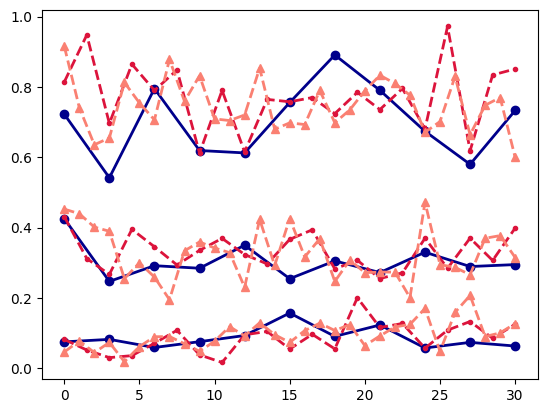

In [94]:
ls = ["-o", "--.", "--^"]
colors = ["darkblue", "crimson", "salmon"]

for i in range(len(metadict["n_tpoints"])):
    sub_df = dfs_by_tsamp[i][dfs_by_tsamp[i].dataset==dfs_by_tsamp[i].dataset.unique()[0]]

    time = sub_df["time"]
    species = sub_df[[f"sp{i}" for i in range(1, n_sp+1)]]

    plt.plot(time, species, ls[i], lw=2, c=colors[i])

plt.show()